# BANK MARKETING

Name: VARSHA N NAIR

Organization: Entri  Elevate

Date: [Evaluation Date]

Introduction: The Bank Marketing dataset contains information from direct phone call marketing campaigns conducted by a Portuguese banking institution. The dataset includes various client attributes, such as age, job, marital status, and education, as well as details about the marketing campaign itself. The primary objective is to predict whether a client will subscribe to a term deposit based on these attributes. This prediction aids in enhancing the effectiveness of future marketing strategies. 

Objective:The objective is to Develop a machine learning model to accurately predict client subscription to term deposits, thereby enhancing the efficiency of future marketing campaigns.



Data Description: The Bank Marketing dataset contains data from direct phone call marketing campaigns conducted by a Portuguese banking institution. It includes 45,211 instances and 17 features, capturing client demographics, contact details, and campaign specifics. 

Source: UCI Machine Learning Repository 

Features: 
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
    related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
    other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")



# Data Collection:

In [69]:
#Import Necessary Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import zscore, skew 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Load the dataset into a DataFrame
data = pd.read_csv('bank12.csv',delimiter=';')

In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
bank_df=pd.DataFrame(data)

In [8]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,yo
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [61]:
# Display the summary of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    age           4521 non-null   int64 
 1     job          4521 non-null   object
 2     marital      4521 non-null   object
 3     education    4521 non-null   object
 4     default      4521 non-null   object
 5     balance      4521 non-null   int64 
 6     housing      4521 non-null   object
 7     loan         4521 non-null   object
 8     contact      4521 non-null   object
 9     day          4521 non-null   int64 
 10    month        4521 non-null   object
 11    duration     4521 non-null   int64 
 12    campaign     4521 non-null   int64 
 13    pdays        4521 non-null   int64 
 14    previous     4521 non-null   int64 
 15    poutcome     4521 non-null   object
 16    y            4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [62]:
# Display statistical summary of numerical columns
print(data.describe())

               age     balance          day      duration      campaign    \
count  4521.000000   4521.000000  4521.000000   4521.000000   4521.000000   
mean     41.170095   1422.657819    15.915284    263.961292      2.793630   
std      10.576211   3009.638142     8.247667    259.856633      3.109807   
min      19.000000  -3313.000000     1.000000      4.000000      1.000000   
25%      33.000000     69.000000     9.000000    104.000000      1.000000   
50%      39.000000    444.000000    16.000000    185.000000      2.000000   
75%      49.000000   1480.000000    21.000000    329.000000      3.000000   
max      87.000000  71188.000000    31.000000   3025.000000     50.000000   

           pdays      previous    
count  4521.000000   4521.000000  
mean     39.766645      0.542579  
std     100.121124      1.693562  
min      -1.000000      0.000000  
25%      -1.000000      0.000000  
50%      -1.000000      0.000000  
75%      -1.000000      0.000000  
max     871.000000     25.

# Data preprocessing:

In [72]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())


Missing values:
  age             0
  job            0
  marital        0
  education      0
  default        0
  balance        0
  housing        0
  loan           0
  contact        0
  day            0
  month          0
  duration       0
  campaign       0
  pdays          0
  previous       0
  poutcome       0
  y              0
dtype: int64


In [77]:
# Impute missing numerical values with mean
num_imputer = SimpleImputer(strategy='mean')
data[data.select_dtypes(include=['float64', 'int64']).columns] = num_imputer.fit_transform(data.select_dtypes(include=['float64', 'int64']))

In [79]:
# Impute missing categorical values with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
data[data.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(data.select_dtypes(include=['object']))

In [81]:
print("Missing values after handling:\n", data.isnull().sum())
print("Missing values have been successfully handled.")

Missing values after handling:
  age             0
  job            0
  marital        0
  education      0
  default        0
  balance        0
  housing        0
  loan           0
  contact        0
  day            0
  month          0
  duration       0
  campaign       0
  pdays          0
  previous       0
  poutcome       0
  y              0
dtype: int64
Missing values have been successfully handled.


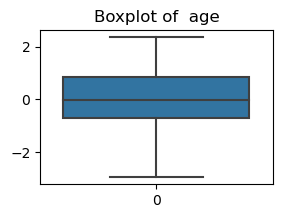

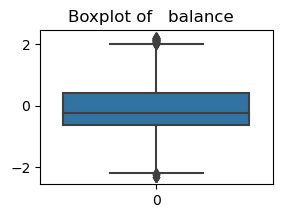

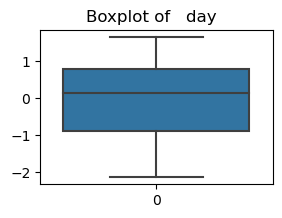

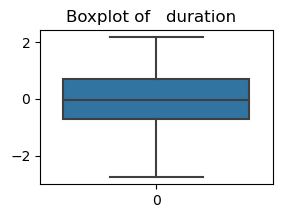

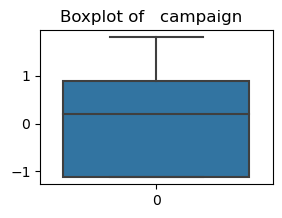

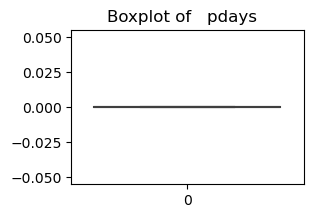

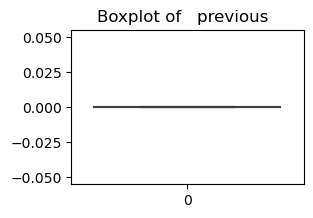

In [106]:
#Check for and Remove Outliers
# Box plot to visualize outliers
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()



In [101]:
# Remove outliers using IQR
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

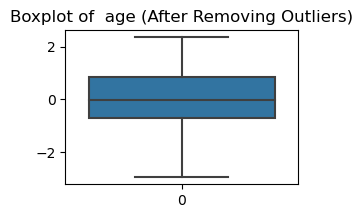

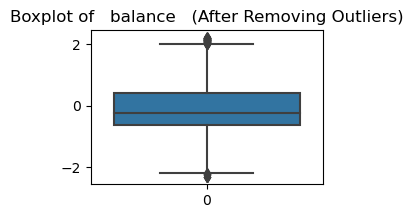

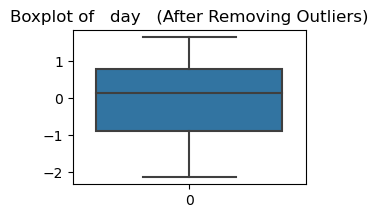

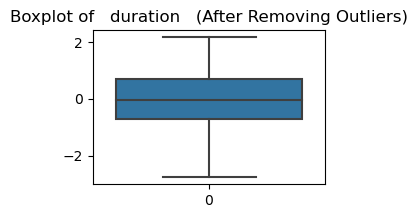

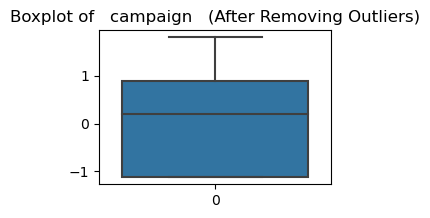

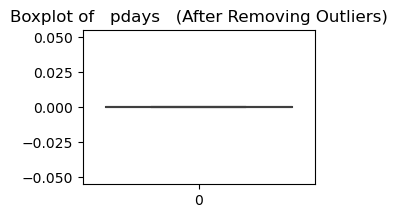

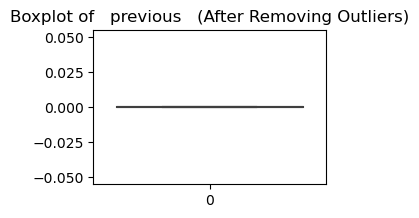

In [107]:
#Boxplot After Removing Outliers
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col} (After Removing Outliers)")
    plt.show()

In [91]:
# Address Skewed Data
# Check skewness
skewness = data[numerical_cols].apply(lambda x: skew(x.dropna()))
print("Skewness before transformation:\n", skewness)


Skewness before transformation:
  age            0.398114
  balance       0.977912
  day           0.135393
  duration      0.860091
  campaign      1.184634
  pdays              NaN
  previous           NaN
dtype: float64


C:\Users\varsh\AppData\Local\Temp\ipykernel_15228\656373938.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = data[numerical_cols].apply(lambda x: skew(x.dropna()))


In [95]:
# Apply PowerTransformer to normalize skewed data
pt = PowerTransformer(method='yeo-johnson')
data[numerical_cols] = pt.fit_transform(data[numerical_cols])

In [96]:
# Validate transformations
skewness_after = data[numerical_cols].apply(lambda x: skew(x))
print("Skewness after transformation:\n", skewness_after)

Skewness after transformation:
  age           -0.000678
  balance       0.297630
  day          -0.145551
  duration     -0.033686
  campaign      0.152800
  pdays              NaN
  previous           NaN
dtype: float64


# Exploratory Data Analysis (EDA):

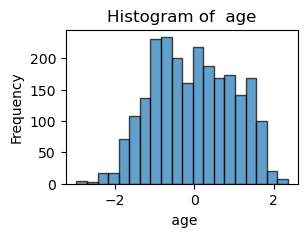

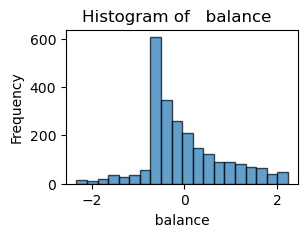

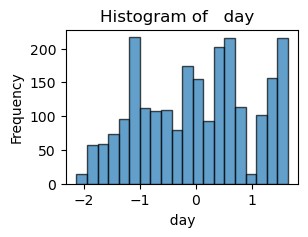

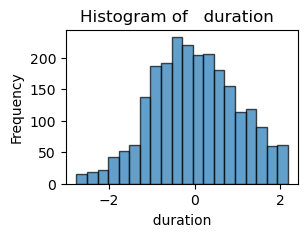

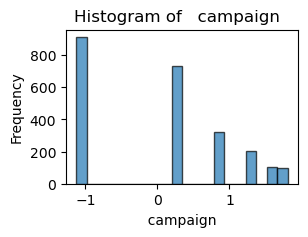

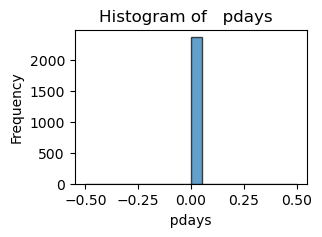

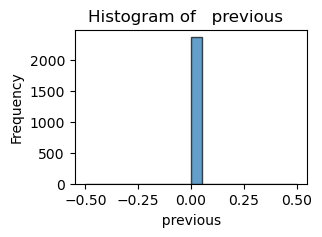

In [108]:
# 1.Histogram: Data distribution for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    plt.hist(data[col], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

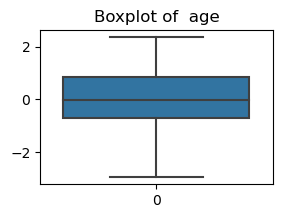

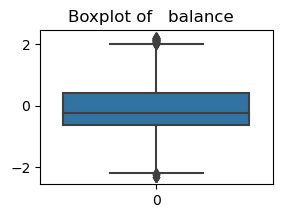

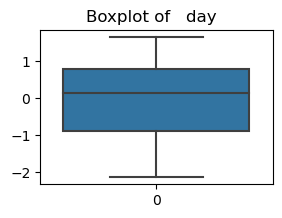

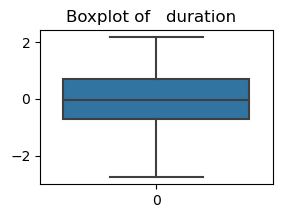

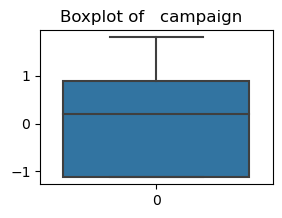

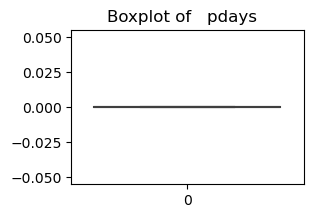

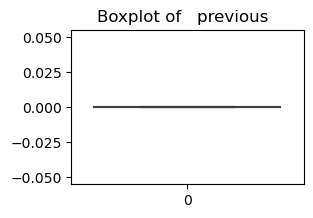

In [109]:
# 2.Boxplot: Identifying outliers
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


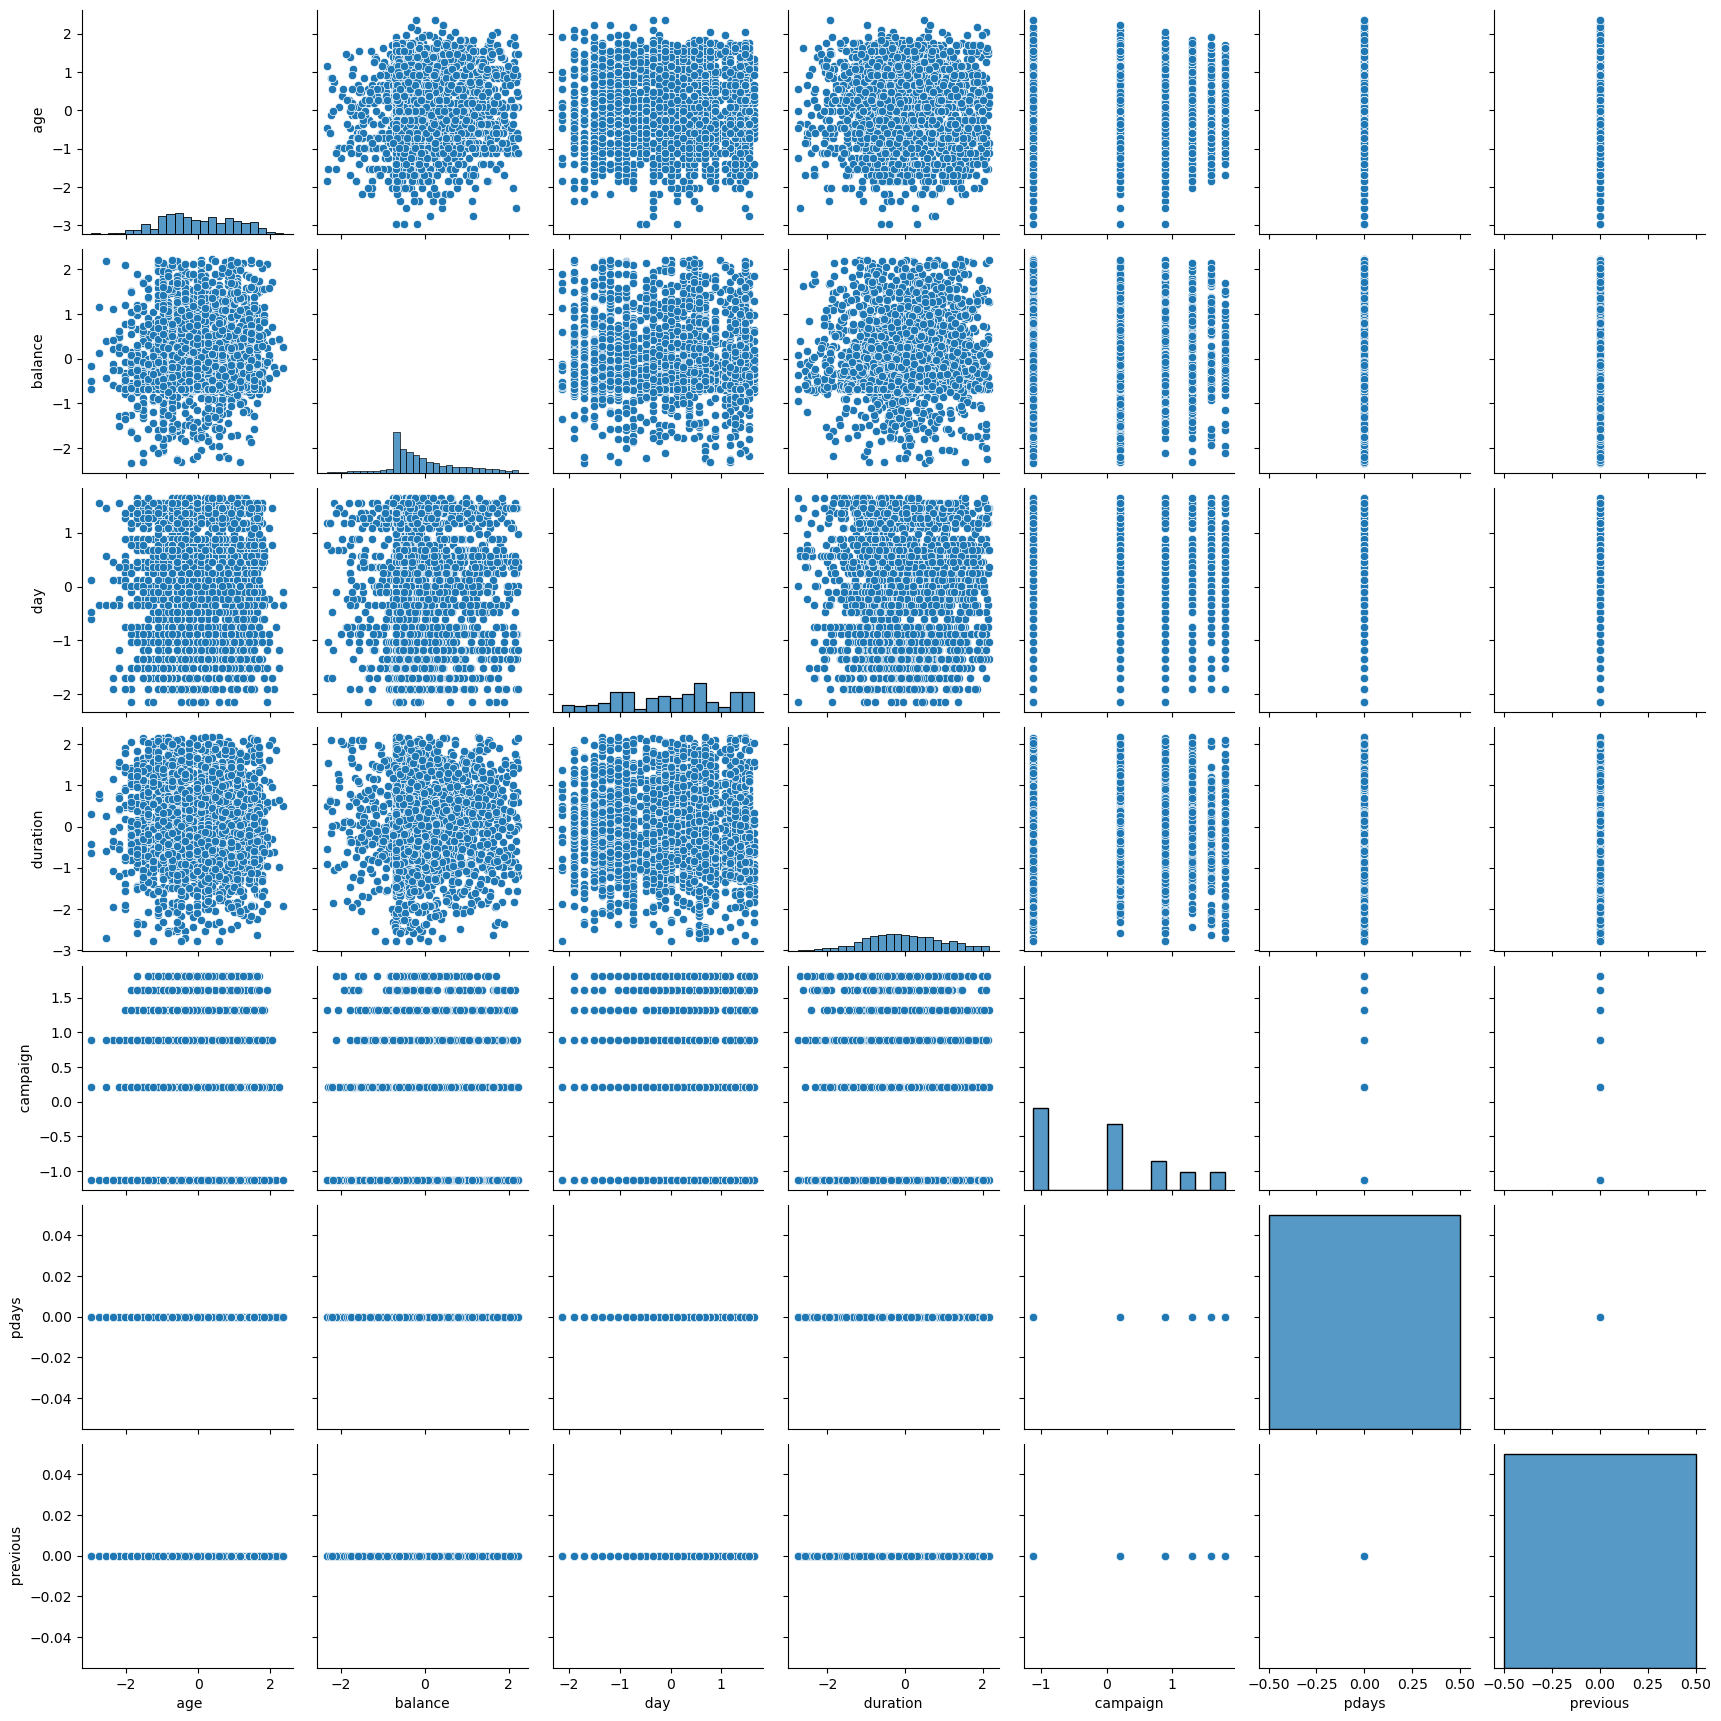

In [110]:
# 3.Pair Plot: Relationships between numerical features
sns.pairplot(data)
plt.show()


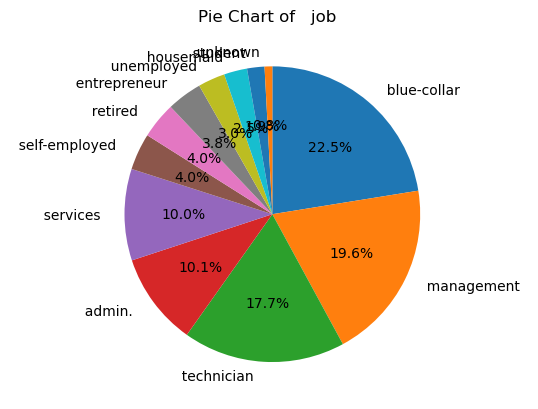

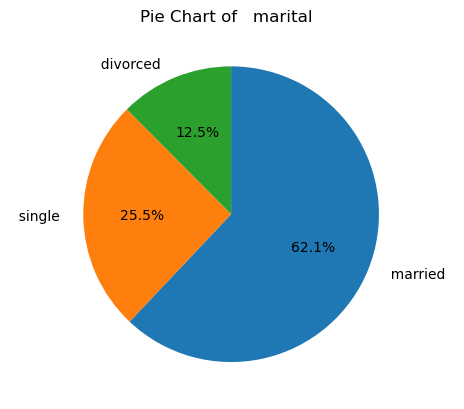

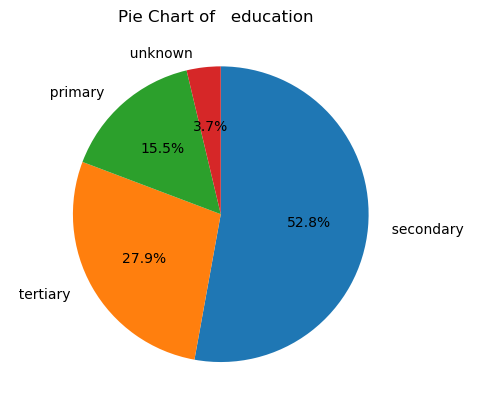

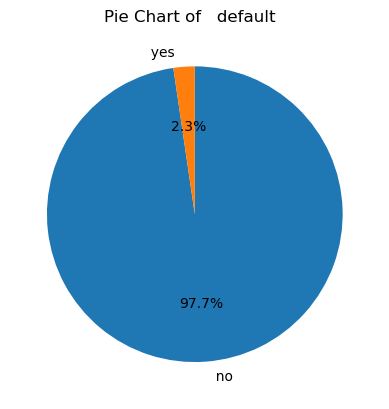

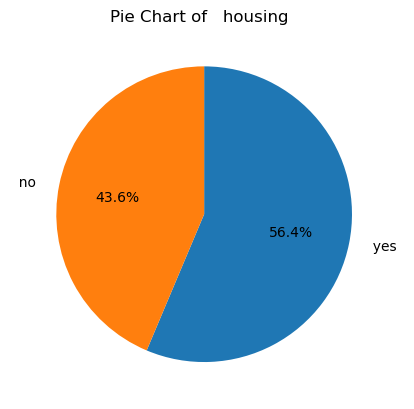

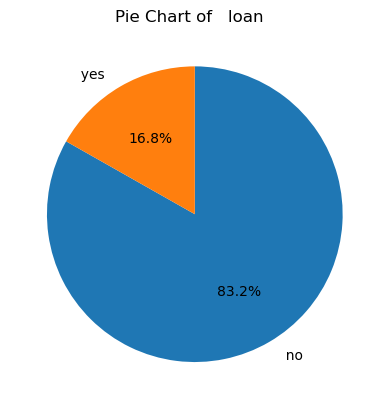

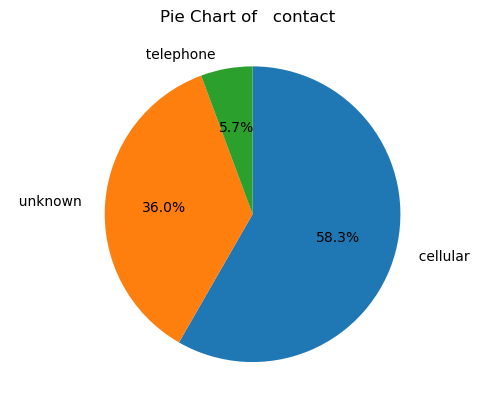

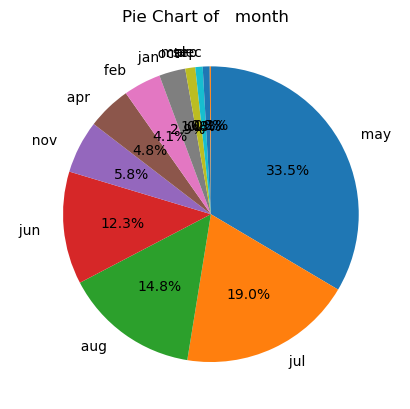

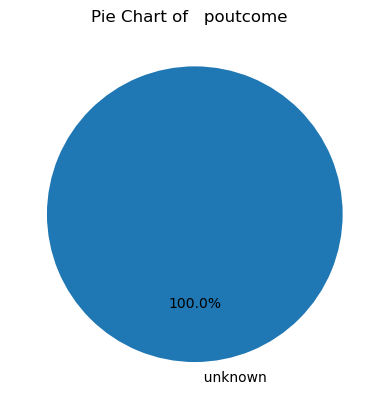

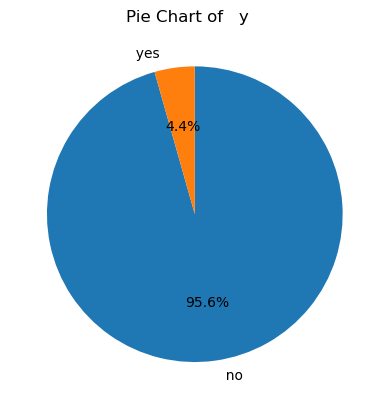

In [120]:
# 4 Pie Diagram: Proportions in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")  # Hide y-axis label
    plt.show()

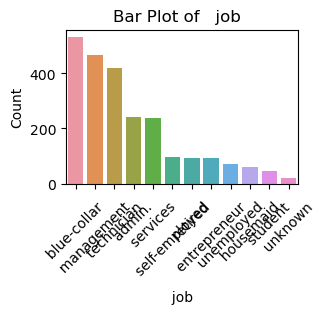

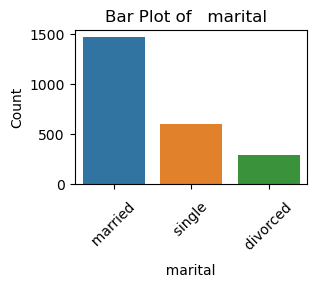

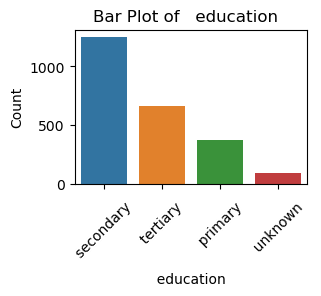

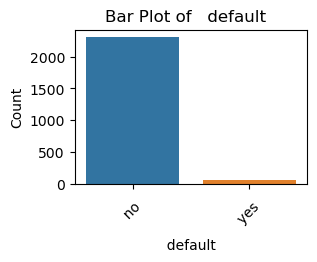

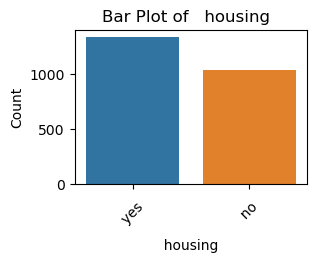

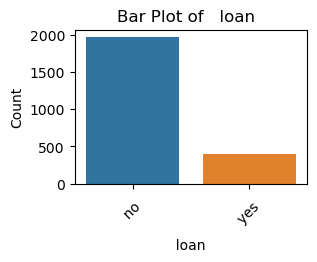

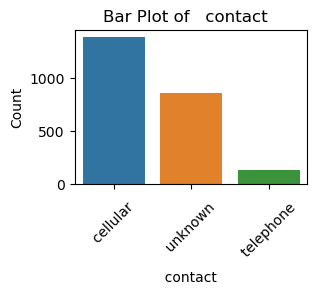

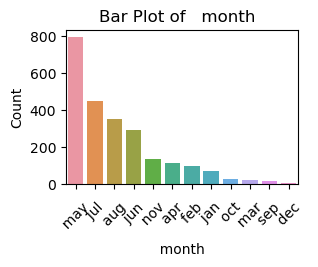

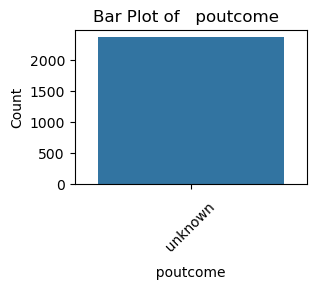

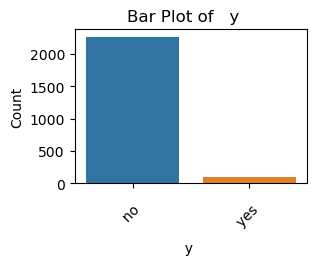

In [118]:
# 5Bar Plot: Categorical data counts
for col in categorical_cols:
    plt.figure(figsize=(3, 2))
    sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts().values)
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

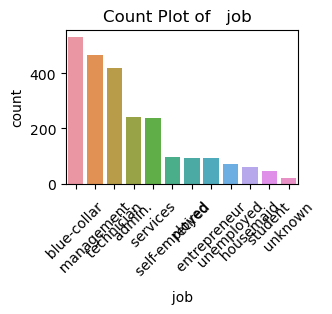

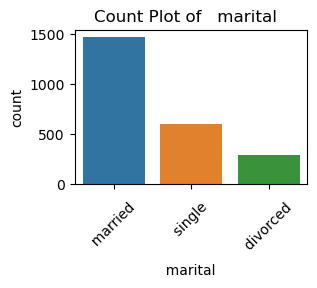

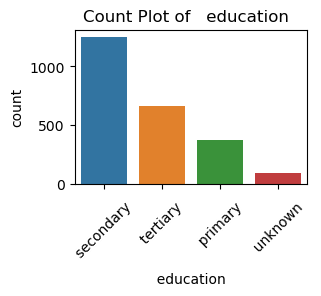

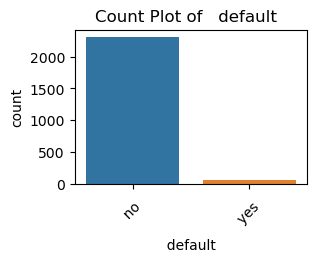

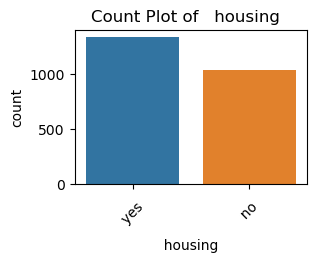

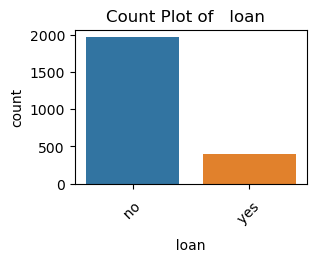

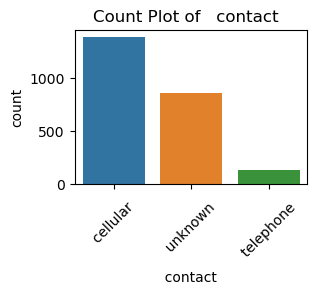

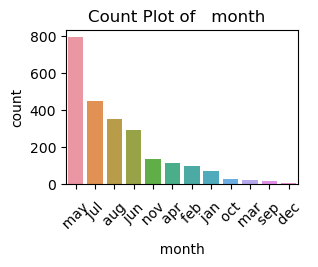

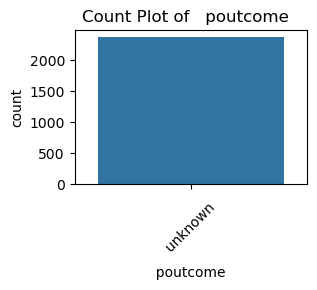

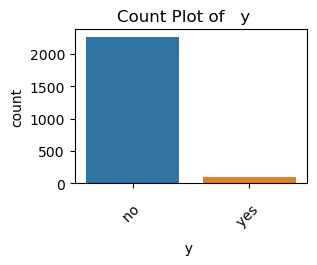

In [121]:
# 6 Count Plot: Count visualization for categorical features
for col in categorical_cols:
    plt.figure(figsize=(3, 2))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

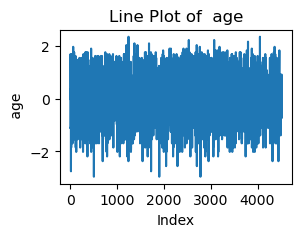

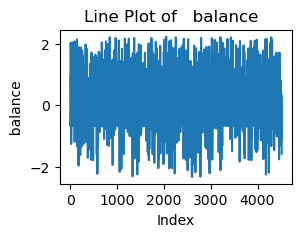

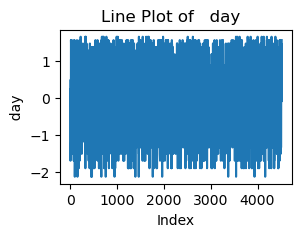

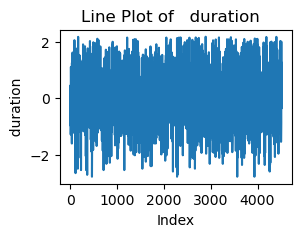

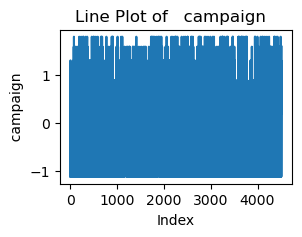

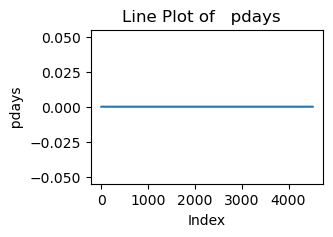

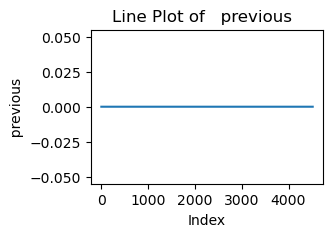

In [123]:
# 7 Line Plot: Trend visualization for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    plt.plot(data.index, data[col])
    plt.title(f"Line Plot of {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.show()

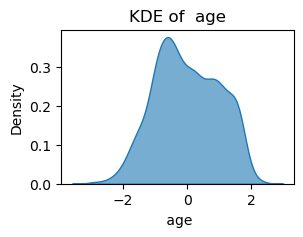

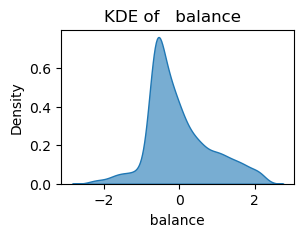

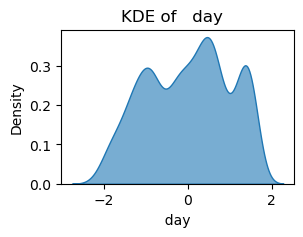

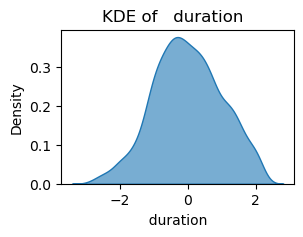

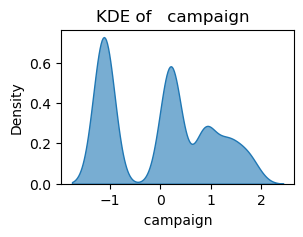

C:\Users\varsh\AppData\Local\Temp\ipykernel_15228\2576457372.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], fill=True, alpha=0.6)


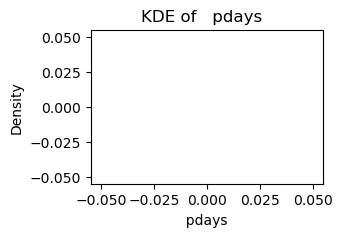

C:\Users\varsh\AppData\Local\Temp\ipykernel_15228\2576457372.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], fill=True, alpha=0.6)


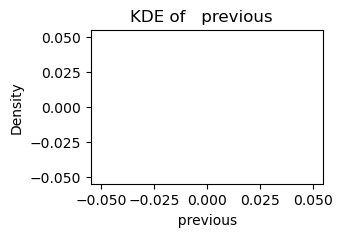

In [122]:
# 8 Kernel Density Estimation (KDE): Data density
for col in numerical_cols:
    plt.figure(figsize=(3, 2))
    sns.kdeplot(data[col], fill=True, alpha=0.6)
    plt.title(f"KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

# Feature Engineering:

In [35]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the transformed dataset
print("\nData After One-Hot Encoding:")
print(data_encoded.head())



Data After One-Hot Encoding:
   age  balance  day  duration  campaign  pdays  previous  \
0   30     1787   19        79         1     -1         0   
1   33     4789   11       220         1    339         4   
2   35     1350   16       185         1    330         1   
3   30     1476    3       199         4     -1         0   
4   59        0    5       226         1     -1         0   

   job_  blue-collar    job_  entrepreneur    job_  housemaid    ...  \
0                False                 False              False  ...   
1                False                 False              False  ...   
2                False                 False              False  ...   
3                False                 False              False  ...   
4                 True                 False              False  ...   

   month_  jun    month_  mar    month_  may    month_  nov    month_  oct    \
0          False          False          False          False           True   
1         

# Feature Extraction:

In [43]:
target_column = 'y_yes' 
X = data.drop(target_column, axis=1)  
y = data[target_column] 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Select top-k features based on importance
k = 5  # Number of features to select
selected_features = feature_importances.nlargest(k).index
X_selected = X[selected_features]

# Scaling the selected features
# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply Standard Scaling
X_standardized = standard_scaler.fit_transform(X_selected)

# Apply Min-Max Scaling
X_normalized = minmax_scaler.fit_transform(X_selected)

# Convert the scaled data to DataFrames for better readability
X_standardized_df = pd.DataFrame(X_standardized, columns=selected_features)
X_normalized_df = pd.DataFrame(X_normalized, columns=selected_features)

# Display the scaled DataFrames
print("Standardized Features (Z-score Scaling):")
print(X_standardized_df)

print("\nNormalized Features (Min-Max Scaling):")
print(X_normalized_df)

Standardized Features (Z-score Scaling):
      duration   balance       age       day  campaign
0    -0.711861  0.121072 -1.056270  0.374052 -0.576829
1    -0.169194  1.118644 -0.772583 -0.596026 -0.576829
2    -0.303898 -0.024144 -0.583458  0.010273 -0.576829
3    -0.250017  0.017726 -1.056270 -1.566105  0.387967
4    -0.146102 -0.472753  1.686036 -1.323585 -0.576829
...        ...       ...       ...       ...       ...
4516  0.250315 -0.583410 -0.772583  1.707910  0.709566
4517 -0.427057 -1.573671  1.496912 -0.838546 -0.576829
4518 -0.434754 -0.374724  1.496912  0.374052  2.639160
4519 -0.519426 -0.094925 -1.245394 -1.202326  0.387967
4520  0.311894 -0.095257  0.267602 -1.566105 -0.255231

[4521 rows x 5 columns]

Normalized Features (Min-Max Scaling):
      duration   balance       age       day  campaign
0     0.024826  0.068455  0.161765  0.600000  0.000000
1     0.071500  0.108750  0.205882  0.333333  0.000000
2     0.059914  0.062590  0.235294  0.500000  0.000000
3     0.064548

# Split Data into Training and Testing Sets:


In [52]:
# Define features (X) and target (Y)
X = data.drop(columns=['y_yes'])
Y = data['y_yes']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining Set Shape: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing Set Shape: X_test: {X_test.shape}, Y_test: {Y_test.shape}")


Training Set Shape: X_train: (3616, 42), Y_train: (3616,)
Testing Set Shape: X_test: (905, 42), Y_test: (905,)


# Model Building:

In [65]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}


# Model Evaluation:


Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94       807
        True       0.54      0.26      0.35        98

    accuracy                           0.90       905
   macro avg       0.73      0.61      0.65       905
weighted avg       0.87      0.90      0.88       905

Confusion Matrix:
[[786  21]
 [ 73  25]]

Model: SVM
Classification Report:
              precision    recall  f1-score   support

       False       0.89      1.00      0.94       807
        True       0.00      0.00      0.00        98

    accuracy                           0.89       905
   macro avg       0.45      0.50      0.47       905
weighted avg       0.80      0.89      0.84       905

Confusion Matrix:
[[806   1]
 [ 98   0]]

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.94      0.93       807
        True       0.46 

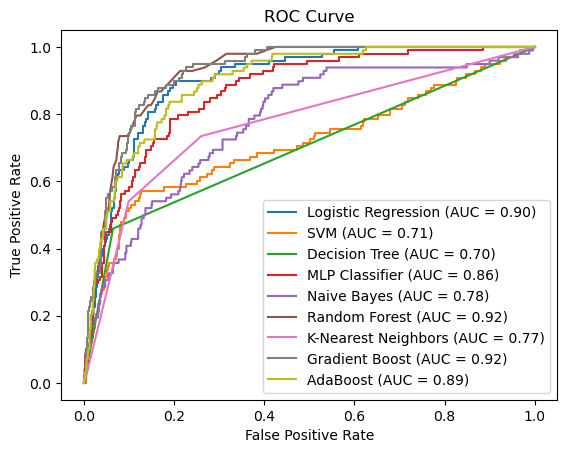

In [68]:
# Function to plot ROC Curve

def plot_roc_curve(fpr, tpr, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc(fpr, tpr):.2f})')

# Train and evaluate models
for name, model in models.items():
    print(f"\nModel: {name}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
# ROC Curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plot_roc_curve(fpr, tpr, name)

# Display ROC Curve
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
    
    


In [73]:
def find_best_model_simple(evaluation_results, primary_metric='F1-Score'):
    best_model = None
    best_score = float('-inf')

    print("Model Performance:")
    for model_name, metrics in evaluation_results.items():
        score = metrics[primary_metric]
        print(f"{model_name}: {primary_metric} = {score:.4f}")
        
        # Update the best model
        if score > best_score:
            best_score = score
            best_model = model_name

    print(f"\nBest Model: {best_model} ({primary_metric} = {best_score:.4f})")
    return best_model

# Example usage
best_model = find_best_model_simple(results, primary_metric='F1-Score')


Model Performance:
Logistic Regression: F1-Score = 0.8790
SVM: F1-Score = 0.8401
Decision Tree: F1-Score = 0.8837
MLP Classifier: F1-Score = 0.8878
Naive Bayes: F1-Score = 0.8512
Random Forest: F1-Score = 0.8732
K-Nearest Neighbors: F1-Score = 0.8645
Gradient Boost: F1-Score = 0.8865
AdaBoost: F1-Score = 0.8951

Best Model: AdaBoost (F1-Score = 0.8951)
